In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('default')

## Capacity 1

In [49]:
df = pd.read_csv('./drone_performance_on_obstacles.csv')

df.head()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,distance_after_obstacle_avoidance,distance_after_dp_optimization
0,20,1,13,171.966595,177.620738,177.201994
1,25,1,13,198.325787,205.403867,204.699944
2,30,1,13,248.800543,261.111970,260.226935
3,40,1,13,325.786639,347.134873,344.907599
4,50,1,13,399.257944,418.320608,417.905925


In [50]:
df['obstacle_free_distance'] = df['obstacle_free_distance'] / 4
df['distance_after_obstacle_avoidance'] = df['distance_after_obstacle_avoidance'] / 4
df['distance_after_dp_optimization'] = df['distance_after_dp_optimization'] / 4

In [51]:
print("Average distance with no obstacle \t\t\t\t:", df[df['drone_capacity']==1]['obstacle_free_distance'].mean())
print("Average distance with obstacle avoidance \t\t\t:",df[df['drone_capacity']==1]['distance_after_obstacle_avoidance'].mean())

Average distance with no obstacle 				: 67.20687539003175
Average distance with obstacle avoidance 			: 70.47960280362581


In [52]:
df_cap_1 = df[df['drone_capacity']==1]

df_cap_1.tail()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,distance_after_obstacle_avoidance,distance_after_dp_optimization
0,20,1,13,42.991649,44.405184,44.300498
1,25,1,13,49.581447,51.350967,51.174986
2,30,1,13,62.200136,65.277992,65.056734
3,40,1,13,81.446660,86.783718,86.226900
4,50,1,13,99.814486,104.580152,104.476481


In [53]:
df_cap_1['rho_obstacle_free'] = df_cap_1['obstacle_free_distance']/df_cap_1['obstacle_free_distance']
df_cap_1['rho_distance_after_obstacle_avoidance'] = df_cap_1['distance_after_obstacle_avoidance']/df_cap_1['obstacle_free_distance']
df_cap_1['rho_distance_after_dp_optimization'] = df_cap_1['distance_after_dp_optimization']/df_cap_1['obstacle_free_distance']

df_cap_1.head()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,distance_after_obstacle_avoidance,distance_after_dp_optimization,rho_obstacle_free,rho_distance_after_obstacle_avoidance,rho_distance_after_dp_optimization
0,20,1,13,42.991649,44.405184,44.300498,1.0,1.032879,1.030444
1,25,1,13,49.581447,51.350967,51.174986,1.0,1.035689,1.032140
2,30,1,13,62.200136,65.277992,65.056734,1.0,1.049483,1.045926
3,40,1,13,81.446660,86.783718,86.226900,1.0,1.065528,1.058692
4,50,1,13,99.814486,104.580152,104.476481,1.0,1.047745,1.046707


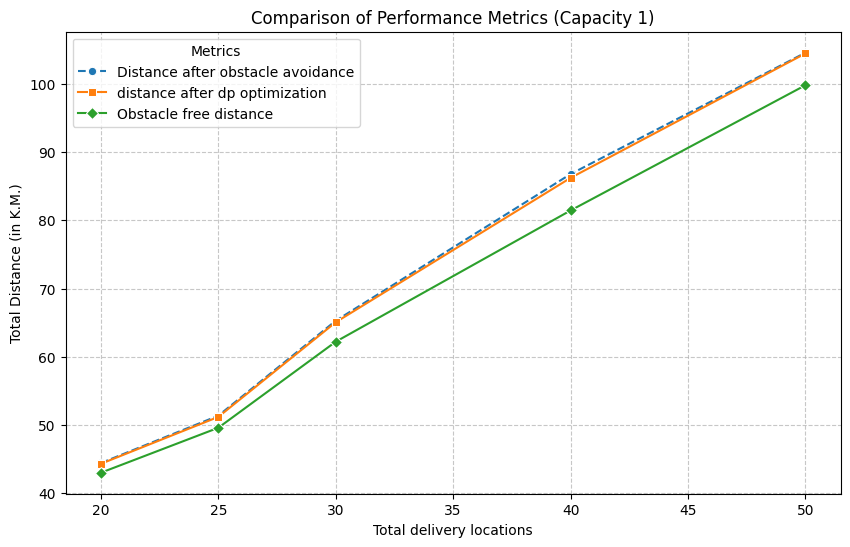

In [54]:
plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_cap_1, x='delivary_locations', y='distance_after_obstacle_avoidance', linestyle="dashed", label='Distance after obstacle avoidance', marker='o', errorbar=None)
sns.lineplot(data=df_cap_1, x='delivary_locations', y='distance_after_dp_optimization', label='distance after dp optimization', marker='s', errorbar=None)
sns.lineplot(data=df_cap_1, x='delivary_locations', y='obstacle_free_distance', label='Obstacle free distance', marker='D', errorbar=None)

plt.title('Comparison of Performance Metrics (Capacity 1)')
plt.xlabel('Total delivery locations')
plt.ylabel('Total Distance (in K.M.)')
plt.legend(title='Metrics')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

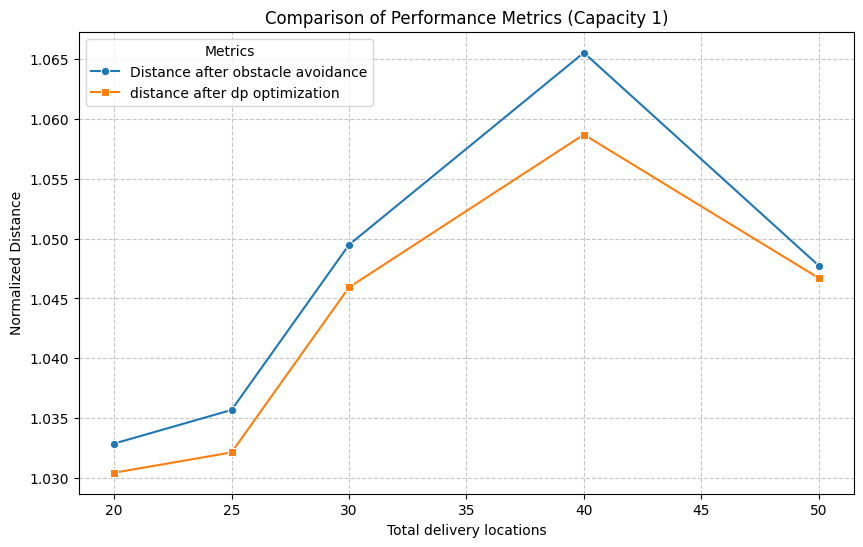

In [55]:
plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_cap_1, x='delivary_locations', y='rho_distance_after_obstacle_avoidance', label='Distance after obstacle avoidance', marker='o', errorbar=None)
sns.lineplot(data=df_cap_1, x='delivary_locations', y='rho_distance_after_dp_optimization', label='distance after dp optimization', marker='s', errorbar=None)

plt.title('Comparison of Performance Metrics (Capacity 1)')
plt.xlabel('Total delivery locations')
plt.ylabel('Normalized Distance')
plt.legend(title='Metrics')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

## Capacity K

In [56]:
df_cap_k = pd.read_csv('./drone_performance_on_obstacle_capacity_k.csv')

df_cap_k.head()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,greedy_distance,christofides_distance,optimized_distance
0,20,5,13,69.293410,73.177027,71.462034,71.035509
1,25,5,13,77.525799,83.516151,79.022468,78.996137
2,30,5,13,89.961525,96.342468,92.686322,92.508920
3,40,5,13,114.113502,125.430176,121.728710,120.602220
4,50,5,13,124.602009,136.887722,134.366283,134.243118


In [57]:
df_cap_k['obstacle_free_distance'] = df_cap_k['obstacle_free_distance'] / 4
df_cap_k['greedy_distance'] = df_cap_k['greedy_distance'] / 4
df_cap_k['christofides_distance'] = df_cap_k['christofides_distance'] / 4
df_cap_k['optimized_distance'] = df_cap_k['optimized_distance'] / 4

df_cap_k.head()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,greedy_distance,christofides_distance,optimized_distance
0,20,5,13,17.323353,18.294257,17.865509,17.758877
1,25,5,13,19.381450,20.879038,19.755617,19.749034
2,30,5,13,22.490381,24.085617,23.171580,23.127230
3,40,5,13,28.528375,31.357544,30.432177,30.150555
4,50,5,13,31.150502,34.221930,33.591571,33.560779


In [58]:
df_cap_k['rho_greedy'] = df_cap_k['greedy_distance']/df_cap_k['obstacle_free_distance']
df_cap_k['rho_christofides'] = df_cap_k['christofides_distance']/df_cap_k['obstacle_free_distance']
df_cap_k['rho_optimized'] = df_cap_k['optimized_distance']/df_cap_k['obstacle_free_distance']

df_cap_k.head(20)

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,greedy_distance,christofides_distance,optimized_distance,rho_greedy,rho_christofides,rho_optimized
0,20,5,13,17.323353,18.294257,17.865509,17.758877,1.056046,1.031296,1.025141
1,25,5,13,19.381450,20.879038,19.755617,19.749034,1.077269,1.019305,1.018966
2,30,5,13,22.490381,24.085617,23.171580,23.127230,1.070930,1.030288,1.028316
3,40,5,13,28.528375,31.357544,30.432177,30.150555,1.099170,1.066734,1.056862
4,50,5,13,31.150502,34.221930,33.591571,33.560779,1.098600,1.078364,1.077375
5,20,10,13,14.887664,17.362096,15.733990,15.306152,1.166207,1.056848,1.028110
6,25,10,13,15.864876,18.529042,16.784659,16.654081,1.167929,1.057976,1.049745
7,30,10,13,18.660635,20.505983,20.063089,19.162800,1.098890,1.075156,1.026910
8,40,10,13,21.429118,23.599882,23.069525,23.023626,1.101300,1.076550,1.074408
9,50,10,13,23.692864,27.249109,24.859911,24.356689,1.150098,1.049257,1.028018


In [59]:
print("Average distance with no obstacle \t\t\t\t:", df_cap_k['obstacle_free_distance'].mean())
print("Average distance with greedy technique \t\t\t\t:",df_cap_k['greedy_distance'].mean())
print("Average distance with christofides technique \t\t\t:",df_cap_k['christofides_distance'].mean())

Average distance with no obstacle 				: 27.169200676185007
Average distance with greedy technique 				: 29.933662650572074
Average distance with christofides technique 			: 28.884208435773836


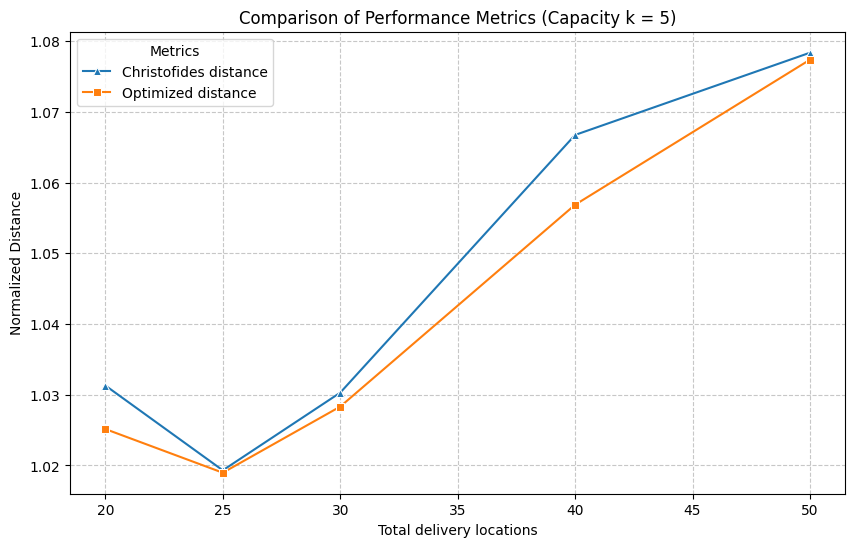

In [60]:
plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_cap_k[df_cap_k['drone_capacity']==5], x='delivary_locations', y='rho_christofides', label='Christofides distance', marker='^', errorbar=None)
sns.lineplot(data=df_cap_k[df_cap_k['drone_capacity']==5], x='delivary_locations', y='rho_optimized', label='Optimized distance', marker='s', errorbar=None)

plt.title('Comparison of Performance Metrics (Capacity k = 5)')
plt.xlabel('Total delivery locations')
plt.ylabel('Normalized Distance')
plt.legend(title='Metrics')

# plt.yticks(np.arange(1.02, 1.12, step=0.01))
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

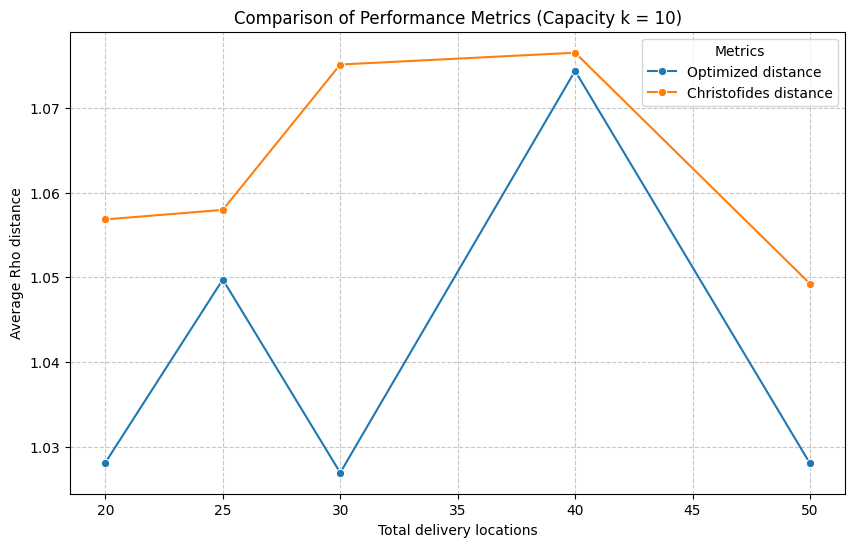

In [61]:
plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_cap_k[df_cap_k['drone_capacity']==10], x='delivary_locations', y='rho_optimized', label='Optimized distance', marker='o', errorbar=None)
sns.lineplot(data=df_cap_k[df_cap_k['drone_capacity']==10], x='delivary_locations', y='rho_christofides', label='Christofides distance', marker='o', errorbar=None)

plt.title('Comparison of Performance Metrics (Capacity k = 10)')
plt.xlabel('Total delivery locations')
plt.ylabel('Average Rho distance')
plt.legend(title='Metrics')

# plt.yticks(np.arange(1.02, 1.12, step=0.01))
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

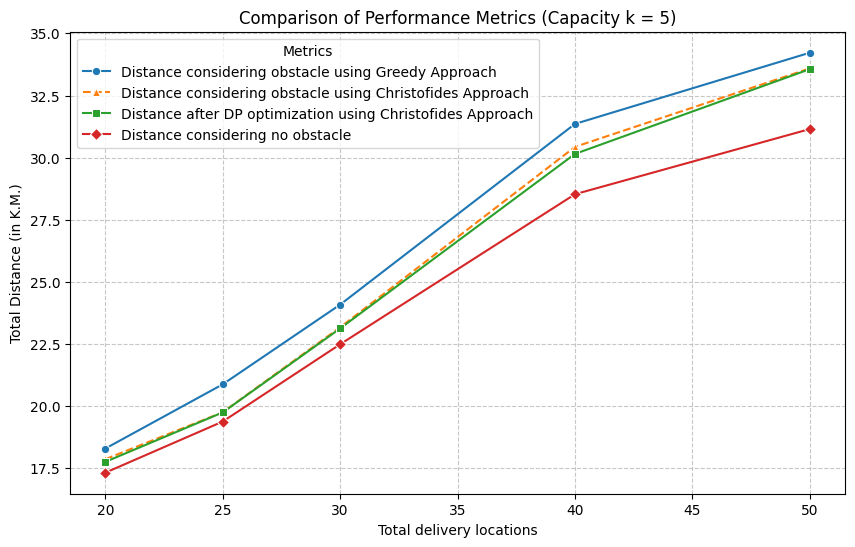

In [62]:
df_cap_5 = df_cap_k[df_cap_k['drone_capacity'] == 5]

plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_cap_5, x='delivary_locations', y='greedy_distance', label='Distance considering obstacle using Greedy Approach', marker='o',errorbar=None)
sns.lineplot(data=df_cap_5, x='delivary_locations', y='christofides_distance', linestyle="dashed", label='Distance considering obstacle using Christofides Approach',marker='^',errorbar=None)
sns.lineplot(data=df_cap_5, x='delivary_locations', y='optimized_distance', label='Distance after DP optimization using Christofides Approach',marker='s',errorbar=None)
sns.lineplot(data=df_cap_5, x='delivary_locations', y='obstacle_free_distance', label='Distance considering no obstacle', marker='D',errorbar=None)

plt.title('Comparison of Performance Metrics (Capacity k = 5)')
plt.xlabel('Total delivery locations')
plt.ylabel('Total Distance (in K.M.)')
plt.legend(title='Metrics')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

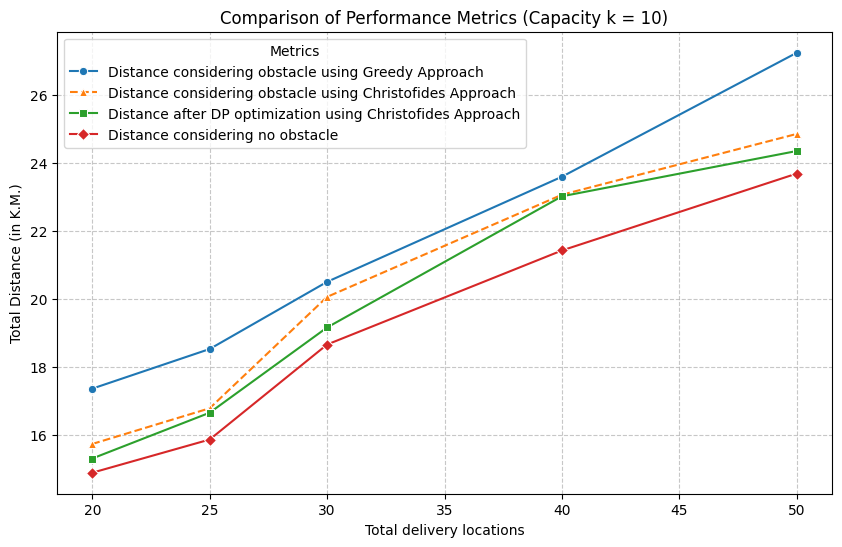

In [63]:
df_cap_10 = df_cap_k[df_cap_k['drone_capacity'] == 10]

plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_cap_10, x='delivary_locations', y='greedy_distance', label='Distance considering obstacle using Greedy Approach', marker='o',errorbar=None)
sns.lineplot(data=df_cap_10, x='delivary_locations', y='christofides_distance', linestyle="dashed", label='Distance considering obstacle using Christofides Approach',marker='^',errorbar=None)
sns.lineplot(data=df_cap_10, x='delivary_locations', y='optimized_distance', label='Distance after DP optimization using Christofides Approach',marker='s',errorbar=None)
sns.lineplot(data=df_cap_10, x='delivary_locations', y='obstacle_free_distance', label='Distance considering no obstacle', marker='D',errorbar=None)

plt.title('Comparison of Performance Metrics (Capacity k = 10)')
plt.xlabel('Total delivery locations')
plt.ylabel('Total Distance (in K.M.)')
plt.legend(title='Metrics')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

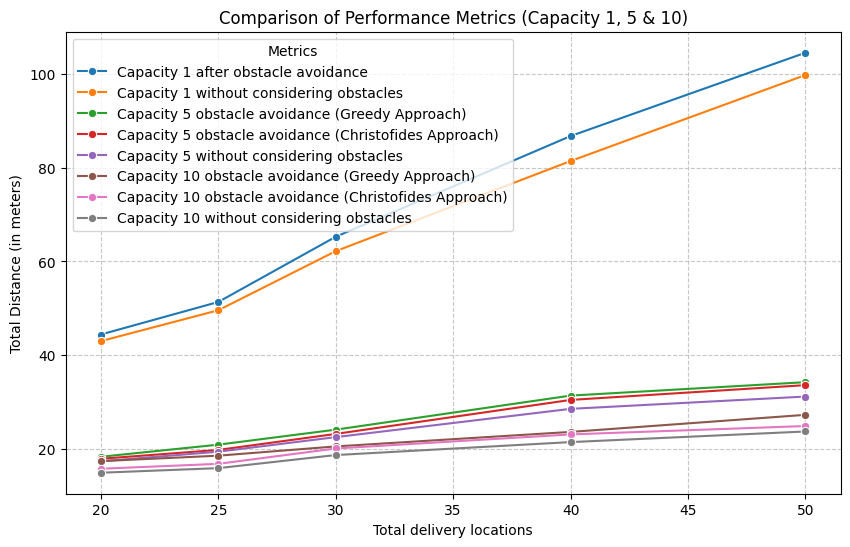

In [64]:
plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_cap_1, x='delivary_locations', y='distance_after_obstacle_avoidance', label='Capacity 1 after obstacle avoidance', marker='o', errorbar=None)
sns.lineplot(data=df_cap_1, x='delivary_locations', y='obstacle_free_distance', label='Capacity 1 without considering obstacles', marker='o', errorbar=None)
sns.lineplot(data=df_cap_5, x='delivary_locations', y='greedy_distance', label='Capacity 5 obstacle avoidance (Greedy Approach)', marker='o',errorbar=None)
sns.lineplot(data=df_cap_5, x='delivary_locations', y='christofides_distance', label='Capacity 5 obstacle avoidance (Christofides Approach)',marker='o',errorbar=None)
sns.lineplot(data=df_cap_5, x='delivary_locations', y='obstacle_free_distance', label='Capacity 5 without considering obstacles', marker='o',errorbar=None)
sns.lineplot(data=df_cap_10, x='delivary_locations', y='greedy_distance', label='Capacity 10 obstacle avoidance (Greedy Approach)', marker='o',errorbar=None)
sns.lineplot(data=df_cap_10, x='delivary_locations', y='christofides_distance', label='Capacity 10 obstacle avoidance (Christofides Approach)',marker='o',errorbar=None)
sns.lineplot(data=df_cap_10, x='delivary_locations', y='obstacle_free_distance', label='Capacity 10 without considering obstacles', marker='o',errorbar=None)


plt.title('Comparison of Performance Metrics (Capacity 1, 5 & 10)')
plt.xlabel('Total delivery locations')
plt.ylabel('Total Distance (in meters)')
plt.legend(title='Metrics')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [65]:
# christofides distance
val_1 = df_cap_1['distance_after_obstacle_avoidance'][df_cap_1['delivary_locations'] == 50].mean()
val_2 = df_cap_k['christofides_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 2)].mean()
val_3 = df_cap_k['christofides_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 3)].mean()
val_4 = df_cap_k['christofides_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 4)].mean()
val_5 = df_cap_k['christofides_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 5)].mean()
val_6 = df_cap_k['christofides_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 6)].mean()
val_7 = df_cap_k['christofides_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 8)].mean()
val_8 = df_cap_k['christofides_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 10)].mean()
# val_25 = df_cap_k['christofides_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 12)].mean()

# obstacle free distance
val_9 = df_cap_1['obstacle_free_distance'][df_cap_1['delivary_locations'] == 50].mean()
val_10 = df_cap_k['obstacle_free_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 2)].mean()
val_11 = df_cap_k['obstacle_free_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 3)].mean()
val_12 = df_cap_k['obstacle_free_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 4)].mean()
val_13 = df_cap_k['obstacle_free_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 5)].mean()
val_14 = df_cap_k['obstacle_free_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 6)].mean()
val_15 = df_cap_k['obstacle_free_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 8)].mean()
val_16 = df_cap_k['obstacle_free_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 10)].mean()
# val_26 = df_cap_k['obstacle_free_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 12)].mean()

# greedy distance
val_17 = df_cap_1['distance_after_obstacle_avoidance'][df_cap_1['delivary_locations'] == 50].mean()
val_18 = df_cap_k['greedy_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 2)].mean()
val_19 = df_cap_k['greedy_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 3)].mean()
val_20 = df_cap_k['greedy_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 4)].mean()
val_21 = df_cap_k['greedy_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 5)].mean()
val_22 = df_cap_k['greedy_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 6)].mean()
val_23 = df_cap_k['greedy_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 8)].mean()
val_24 = df_cap_k['greedy_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 10)].mean()
# val_27 = df_cap_k['greedy_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 12)].mean()

# optimized christofides distance
val_31 = df_cap_1['distance_after_obstacle_avoidance'][df_cap_1['delivary_locations'] == 50].mean()
val_32 = df_cap_k['optimized_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 2)].mean()
val_33 = df_cap_k['optimized_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 3)].mean()
val_34 = df_cap_k['optimized_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 4)].mean()
val_35 = df_cap_k['optimized_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 5)].mean()
val_36 = df_cap_k['optimized_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 6)].mean()
val_37 = df_cap_k['optimized_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 8)].mean()
val_38 = df_cap_k['optimized_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 10)].mean()
# val_25 = df_cap_k['christofides_distance'][(df_cap_k['delivary_locations'] == 50) & (df_cap_k['drone_capacity'] == 12)].mean()

data = {
    'capacity' : [1, 2, 3, 4, 5, 6, 8, 10],
    'Distance after obstacle avoidance (Christofides method)' : [val_1, val_2, val_3, val_4, val_5, val_6, val_7, val_8],
    'Obstacle free distance': [val_9, val_10, val_11, val_12, val_13, val_14, val_15, val_16],
    'Distance after obstacle avoidance (Greedy method)' : [val_17, val_18, val_19, val_20, val_21, val_22, val_23, val_24],
    'Distance after DP optimization (Christofides method)' : [val_31,val_32,val_33,val_34,val_35, val_36, val_37, val_38]
}

df_final = pd.DataFrame(data)


df_final

,capacity,Distance after obstacle avoidance (Christofides method),Obstacle free distance,Distance after obstacle avoidance (Greedy method),Distance after DP optimization (Christofides method)
0,1,104.580152,99.814486,104.580152,104.580152
1,2,62.128674,58.645239,62.128674,62.076839
2,3,45.937547,43.134298,45.873036,45.927825
3,4,40.461528,37.529654,41.415468,40.447353
4,5,33.591571,31.150502,34.221930,33.560779
5,6,31.387094,29.753580,32.249278,31.372134
6,8,28.452432,26.117611,30.593824,28.461741
7,10,24.859911,23.692864,27.249109,24.356689


In [66]:
df_final_1 = df_final[(df_final['capacity'] == 1) | (df_final['capacity'] == 3) | (df_final['capacity'] == 5) | (df_final['capacity'] == 8) | (df_final['capacity'] == 10)]
df_final_2 = df_final[(df_final['capacity'] == 4) | (df_final['capacity'] == 5) |  (df_final['capacity'] == 6) | (df_final['capacity'] == 8) | (df_final['capacity'] == 10)]

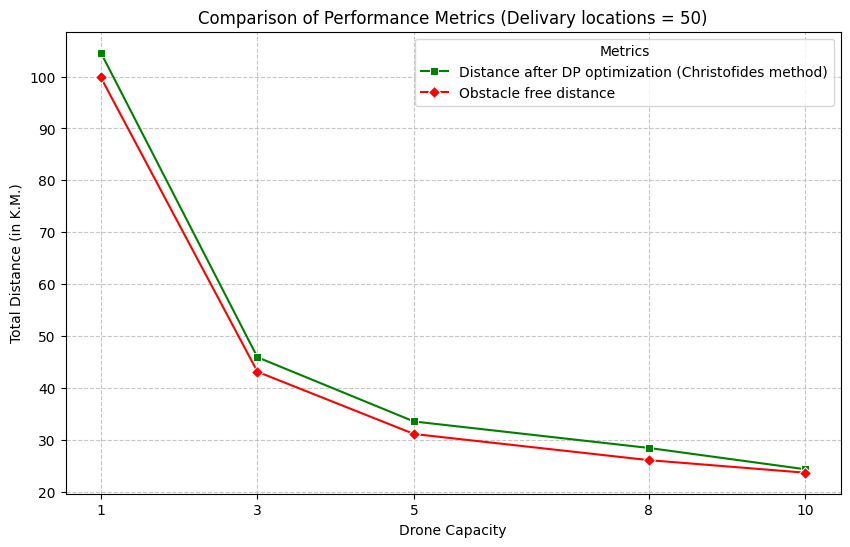

In [67]:
plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_final_1, x='capacity', y='Distance after DP optimization (Christofides method)',color="green",marker='s',errorbar=None, label = "Distance after DP optimization (Christofides method)")
# sns.lineplot(data=df_final, x='capacity', y='Distance after obstacle avoidance (Greedy method)',marker='o',errorbar=None, label = "Distance after obstacle avoidance (Greedy method)")
sns.lineplot(data=df_final_1, x='capacity', y='Obstacle free distance',marker='D',errorbar=None,color="red", label = "Obstacle free distance")

plt.title('Comparison of Performance Metrics (Delivary locations = 50)')
plt.xlabel('Drone Capacity')
plt.ylabel('Total Distance (in K.M.)')
plt.legend(title='Metrics')

plt.xticks([1,3,5,8,10])

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

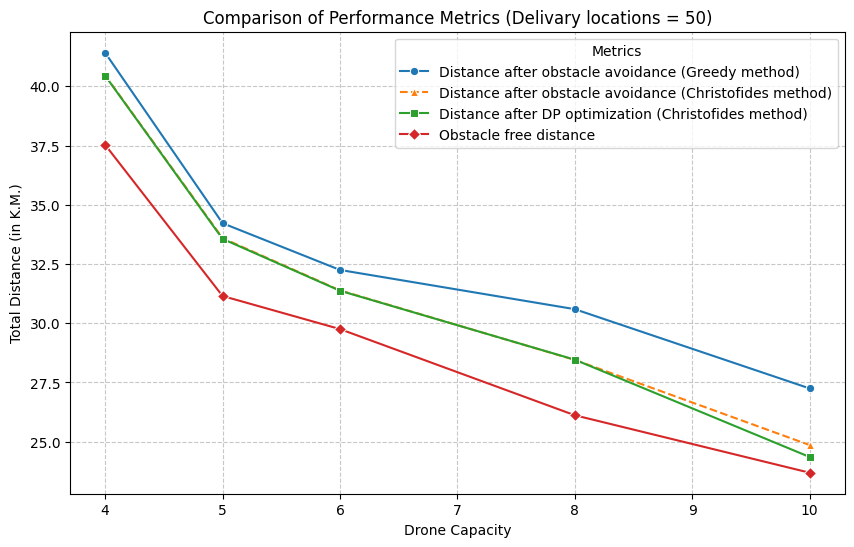

In [68]:
plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_final_2, x='capacity', y='Distance after obstacle avoidance (Greedy method)',marker='o',errorbar=None, label = "Distance after obstacle avoidance (Greedy method)")
sns.lineplot(data=df_final_2, x='capacity', y='Distance after obstacle avoidance (Christofides method)', linestyle="dashed",marker='^',errorbar=None, label = "Distance after obstacle avoidance (Christofides method)")
sns.lineplot(data=df_final_2, x='capacity', y='Distance after DP optimization (Christofides method)',marker='s',errorbar=None, label = "Distance after DP optimization (Christofides method)")
sns.lineplot(data=df_final_2, x='capacity', y='Obstacle free distance',marker='D',errorbar=None, label = "Obstacle free distance")

plt.title('Comparison of Performance Metrics (Delivary locations = 50)')
plt.xlabel('Drone Capacity')
plt.ylabel('Total Distance (in K.M.)')
plt.legend(title='Metrics')

# plt.xticks([1,3,5,8,10])

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()